## Load the Data
This section handles importing the necessary libraries, loading the dataset, and performing initial inspections such as viewing the first few rows, checking the shape, and reviewing the dataset information.

### Prompt:
> import pandas, seaborn, and matplotlib.pyplot

---

### Description:
Importing the core libraries for data analysis and visualization:
- `pandas` for data manipulation and analysis  
- `seaborn` for statistical visualizations  
- `matplotlib.pyplot` for general plotting


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set some default visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


### Prompt:
> load in the file creditcard.csv and print the head of the data

---

### Description:
We will load the dataset named **`card_transdata.csv`** into a pandas DataFrame and display the first few rows to get an overview of its structure and contents.


In [7]:
# Load the dataset
df = pd.read_csv("card_transdata.csv")

# Display the first few rows
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


### Prompt:
> check the shape and info() of the df

---

### Description:
We’ll examine:
- The **shape** of the DataFrame to see the number of rows and columns.  
- The **info()** summary to understand column data types and identify any missing values or memory usage issues.


In [8]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display info summary
print("\nDataFrame Info:")
df.info()

Shape of the DataFrame: (999, 8)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


## Data Wrangling

### Prompt:
> check the columns for missing values

---

### Description:
We’ll check each column in the dataset for missing or null values.  
This helps identify any data quality issues that need to be handled before analysis.


In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values (if any)
missing_values


distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

### Prompt:
> Since there are missing values, we must decide what to do about them. One option is to drop any row that has a null value. In this case, since the number of rows we would drop is a small proportion out of the total number of rows in the dataset, it's not a big deal to drop them.

---

### Description:
We will remove any rows containing missing values.  
Because these rows represent only a small fraction of the dataset, dropping them will not significantly affect the analysis.


In [12]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Confirm the result
print("Original shape:", df.shape)
print("New shape after dropping nulls:", df_cleaned.shape)


Original shape: (999, 8)
New shape after dropping nulls: (977, 8)


### Prompt:
> lastly, please show the first few rows of our clean data

---

### Description:
After cleaning the dataset and removing rows with missing values, we will display the first few rows to confirm that the data looks consistent and ready for further analysis.


In [15]:
# Display the first few rows of the cleaned dataset
df_cleaned.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


## Visualize the Data


### Prompt:
> first, visualize the class distribution of fraud

---

### Description:
We’ll visualize the distribution of the **target variable** (e.g., `Class`), which indicates whether a transaction is fraudulent or not.  
This helps us understand if the dataset is imbalanced — a common issue in fraud detection tasks.


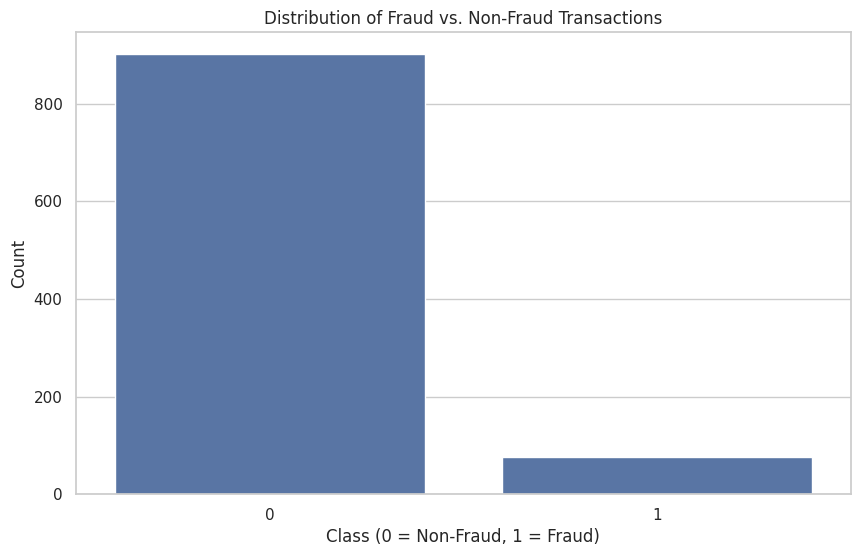

,Proportion
fraud,
0,0.922211
1,0.077789


In [18]:
# Visualize the class distribution of fraud
sns.countplot(x='fraud', data=df_cleaned)

# Add labels and title
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Display numerical counts for reference
df_cleaned['fraud'].value_counts(normalize=True).to_frame('Proportion')


### Prompt:
> visualize the used_pin_number distribution

---

### Description:
We’ll visualize the distribution of the **`used_pin_number`** feature to understand how frequently different PIN numbers are used.  
This can reveal patterns or anomalies in PIN usage that might correlate with fraudulent activity.


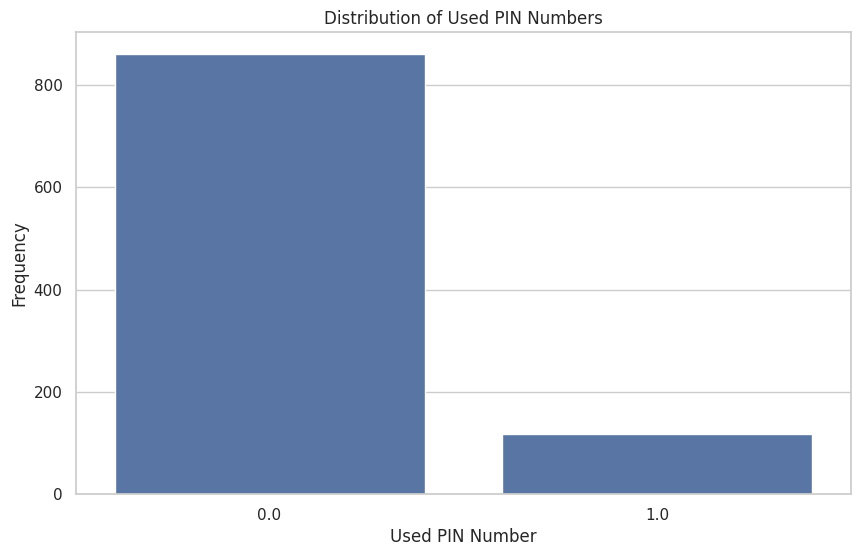

In [25]:
# Visualize the distribution of used_pin_number
sns.countplot(data = df_cleaned, x='used_pin_number')

# Add labels and title
plt.title('Distribution of Used PIN Numbers')
plt.xlabel('Used PIN Number')
plt.ylabel('Frequency')
plt.show()


### Prompt:
> visualize the repeat_retailer distribution with a countplot

---

### Description:
We’ll use a **countplot** to visualize the distribution of the **`repeat_retailer`** feature.  
This will show how often transactions occur with repeat versus non-repeat retailers, helping identify patterns that may relate to fraud.


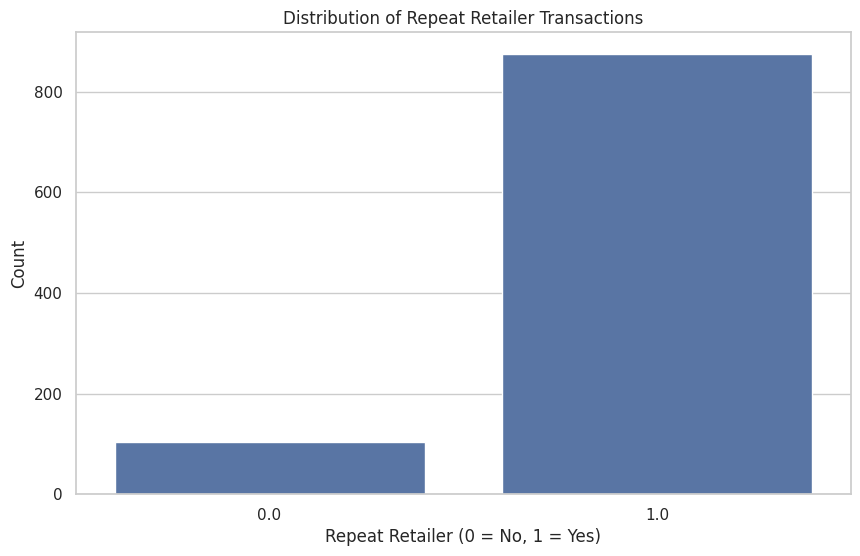

In [27]:
# Visualize the distribution of repeat_retailer
sns.countplot(x='repeat_retailer', data=df_cleaned)

# Add labels and title
plt.title('Distribution of Repeat Retailer Transactions')
plt.xlabel('Repeat Retailer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Prompt:
> do the same for online orders please

---

### Description:
We’ll use a **countplot** to visualize the distribution of the **`online_order`** feature.  
This shows how many transactions were made online versus in person, which can help identify behavioral differences between fraud and non-fraud transactions.


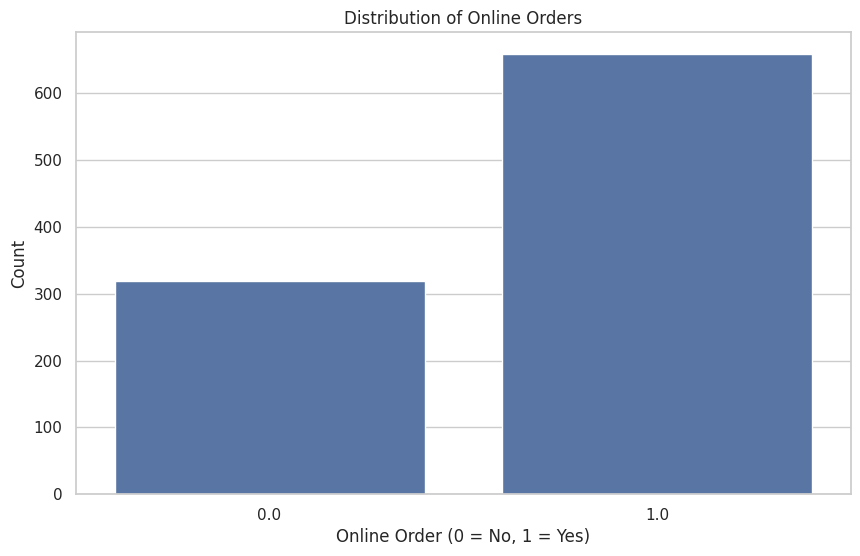

In [28]:
# Visualize the distribution of online_order
sns.countplot(x='online_order', data=df_cleaned)

# Add labels and title
plt.title('Distribution of Online Orders')
plt.xlabel('Online Order (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Prompt:
> Visualize the distribution of 'ratio_to_median_purchase_price' please

---

### Description:
We’ll plot the distribution of the **`ratio_to_median_purchase_price`** feature using a histogram with a KDE (kernel density estimate).  
This helps us understand how transaction amounts compare to the median purchase price and whether any extreme values or skewness are present.


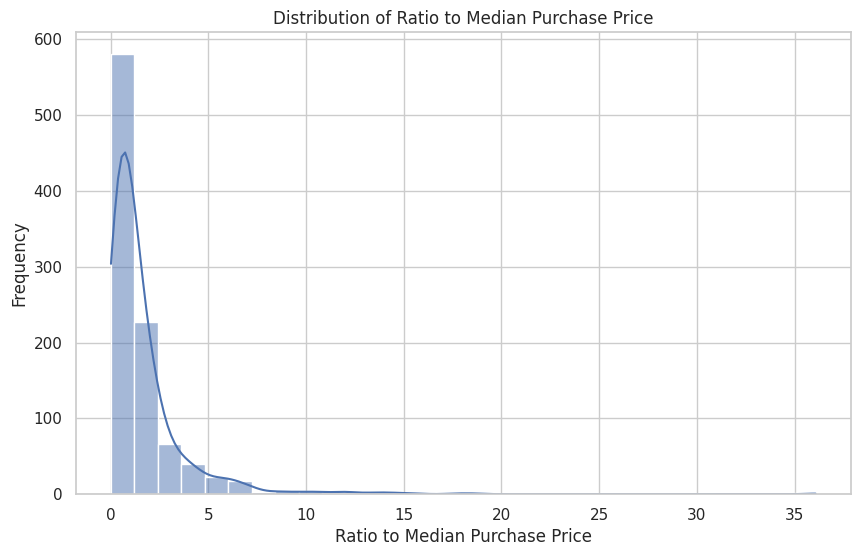

In [29]:
# Visualize the distribution of ratio_to_median_purchase_price
sns.histplot(df_cleaned['ratio_to_median_purchase_price'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Frequency')
plt.show()


### Prompt:
> visualize the distribution of distance_from_home

---

### Description:
We’ll visualize the distribution of the **`distance_from_home`** feature using a histogram with a KDE curve.  
This will help identify how far customers typically are from home during transactions, and whether fraudulent transactions tend to occur at greater distances.


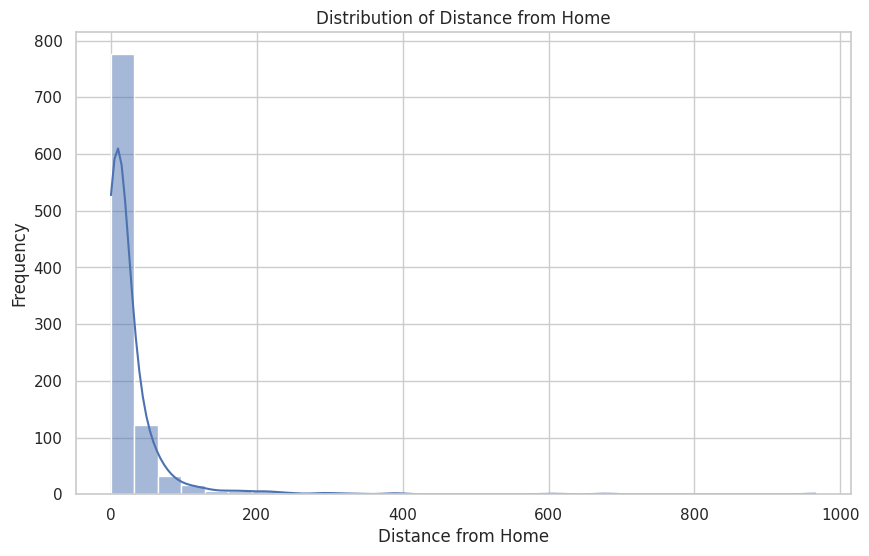

In [31]:
# Visualize the distribution of distance_from_home
sns.histplot(df_cleaned['distance_from_home'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.show()


## Better Visualizations: Bivariate Visualizations  


### Prompt:
> visualize used_pin_number with a hue of fraud (no KDE since it's categorical)

---

### Description:
We’ll use a **countplot** to visualize the frequency of each **`used_pin_number`**, separated by **fraud status**.  
This will show how often each PIN number is used in fraudulent versus non-fraudulent transactions.


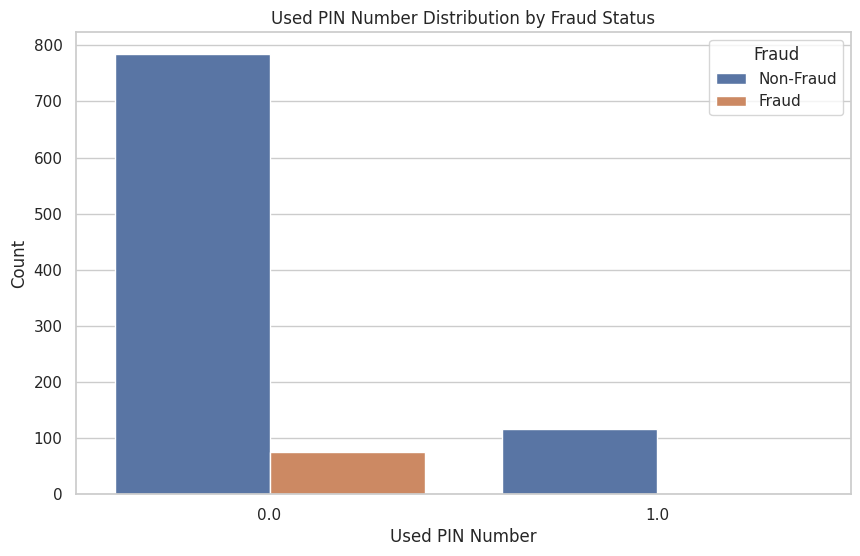

In [34]:
# Visualize used_pin_number distribution by fraud status
sns.countplot(data=df_cleaned, x='used_pin_number', hue='fraud')

# Add labels and title
plt.title('Used PIN Number Distribution by Fraud Status')
plt.xlabel('Used PIN Number')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


### Prompt:
> visualize used_pin_number with fraud as percentages and stacked

---

### Description:
We’ll create a **stacked percentage bar chart** for `used_pin_number` to see the proportion of fraudulent and non-fraudulent transactions for each PIN.  
This highlights relative differences even if some PINs are used more frequently overall.


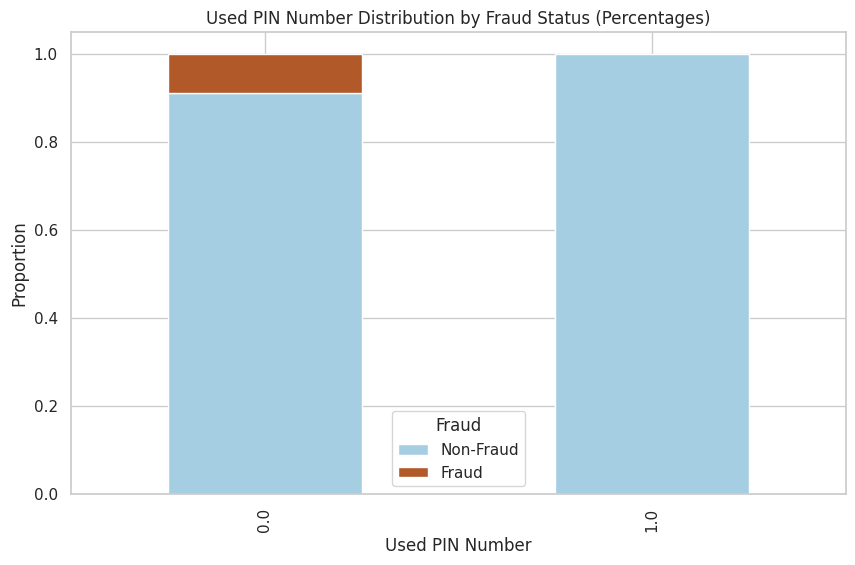

In [35]:
# Prepare percentage data
percentage_df = df_cleaned.groupby(['used_pin_number', 'fraud']).size().unstack(fill_value=0)
percentage_df = percentage_df.div(percentage_df.sum(axis=1), axis=0)  # convert to percentages

# Plot stacked bar chart
percentage_df.plot(kind='bar', stacked=True, colormap='Paired')

# Add labels and title
plt.title('Used PIN Number Distribution by Fraud Status (Percentages)')
plt.xlabel('Used PIN Number')
plt.ylabel('Proportion')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


### Prompt:
> visualize used_chip with a hue of fraud

---

### Description:
We’ll visualize the **`used_chip`** variable to see how transactions with or without a chip correlate with fraud.  
First, we’ll show a **stacked countplot** to compare raw counts between fraudulent and non-fraudulent transactions.


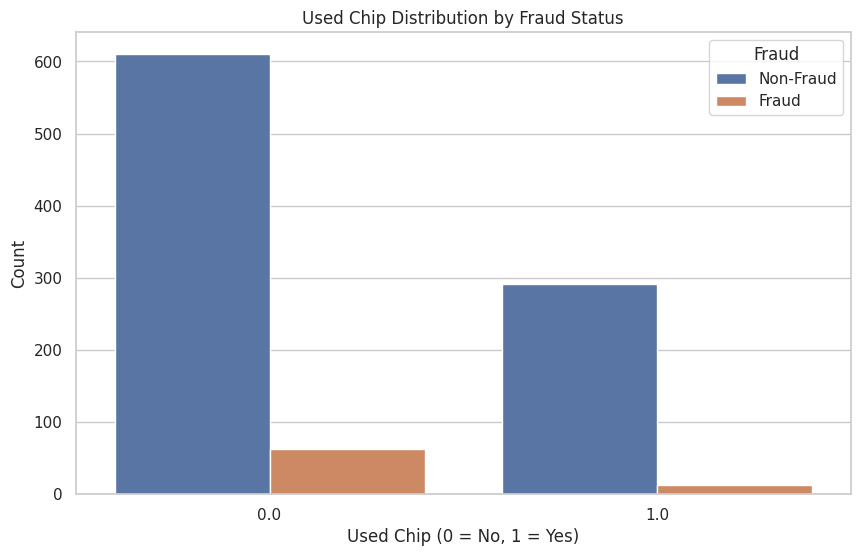

In [36]:
# Countplot for used_chip with fraud hue
sns.countplot(data=df_cleaned, x='used_chip', hue='fraud')

# Add labels and title
plt.title('Used Chip Distribution by Fraud Status')
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


### Prompt:
> visualize used_chip with fraud as percentages and stacked

---

### Description:
Next, we’ll create a **stacked percentage bar chart** for `used_chip` to highlight the proportion of fraud and non-fraud transactions for chip and non-chip transactions.


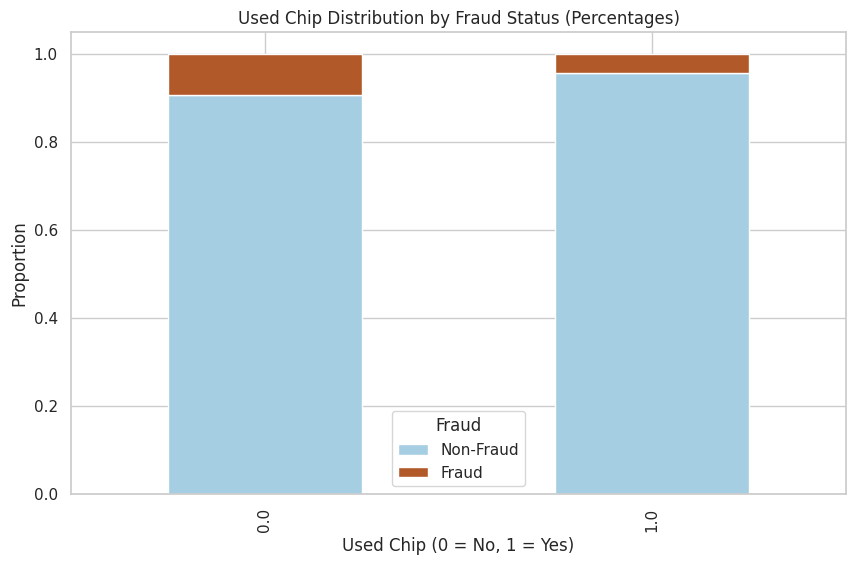

In [37]:
# Prepare percentage data for used_chip
percentage_chip_df = df_cleaned.groupby(['used_chip', 'fraud']).size().unstack(fill_value=0)
percentage_chip_df = percentage_chip_df.div(percentage_chip_df.sum(axis=1), axis=0)

# Plot stacked percentage bar chart
percentage_chip_df.plot(kind='bar', stacked=True, colormap='Paired')

# Add labels and title
plt.title('Used Chip Distribution by Fraud Status (Percentages)')
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


### Prompt:
> show the number of transactions that were fraudulent vs non-fraudulent when it was an online_order or not

---

### Description:
We’ll visualize how **fraud status** varies depending on whether the transaction was an **online order** or not.  
A **countplot with hue** will make it easy to compare fraudulent vs. non-fraudulent counts for online and offline orders.


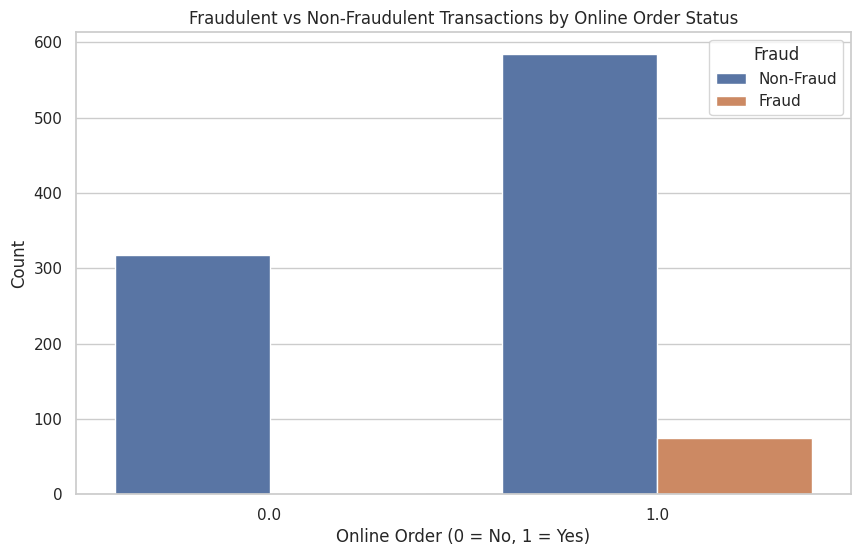

In [39]:
# Countplot of fraud vs non-fraud by online_order
sns.countplot(data=df_cleaned, x='online_order', hue='fraud')

# Add labels and title
plt.title('Fraudulent vs Non-Fraudulent Transactions by Online Order Status')
plt.xlabel('Online Order (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


### Prompt:
> make a scatterplot of ratio_to_median_purchase_price vs distance_from_home with a hue of fraud

---

### Description:
We’ll create a scatterplot of **`ratio_to_median_purchase_price`** vs **`distance_from_home`**, colored by **fraud status**.  
This helps us identify whether fraudulent transactions tend to occur at certain distances or with unusual purchase ratios.


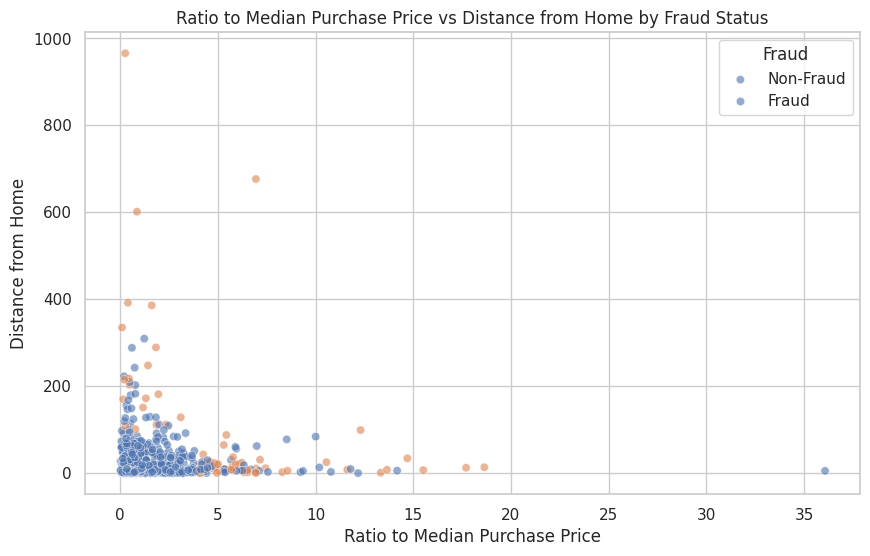

In [45]:
# Scatterplot of ratio_to_median_purchase_price vs distance_from_home with fraud hue
sns.scatterplot(
    data=df_cleaned, 
    x='ratio_to_median_purchase_price', 
    y='distance_from_home', 
    hue='fraud',
    alpha=0.6
)

# Add labels and title
plt.title('Ratio to Median Purchase Price vs Distance from Home by Fraud Status')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Distance from Home')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()
